In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [58]:
n = 500
d = 1000
k = 100
sigma = 1

#make w array
w = np.zeros(d)
for j in range(10):
    w[j] = j/10
    

x = np.random.normal(size=(n, d))
y = w @ x.T + np.random.normal(0, sigma, size=(n))

print("x shape", x.shape)
print("y shape", y.shape)

x shape (500, 1000)
y shape (500,)


In [56]:
def CDA(x, y, lam, delta = 10e-8):
    going = True
    (n,d) = x.shape
    w = np.ones((1,d))
    w_prev = np.copy(w)
    count = 0
    while going:
        b = np.mean(y - w@x.T)
        for k in range(d):
            ak = 2 * np.linalg.norm(x[:,k])**2
            ck = 0
            for i in range(n):
                summation = 0
                for j in range(d):
                    if j !=k:
                        summation += w[0,j] * x[i,j]
#                 print("summation = ", summation)
                ck += 2* x[i, k]*(y[i] - (b + summation)) 

            if(ck < -lam):
                w[0, k] = (ck+lam)/ak
            elif (ck>lam):
                w[0, k] = (ck-lam)/ak
            else:
                w[0, k] = 0
                
                
        #Check if converged
        diff = np.max(np.abs(w - w_prev))
        print("diff = ", np.max(np.abs(w - w_prev)))
        if( np.max(np.abs(w - w_prev)) < delta):
#         if(np.max(np.abs(w - w_prev)) < delta):
#             print("max = ", np.max(np.abs(w - w_prev)))
            return w
        if(count > 100):
            print("count stopped it")
            return w
        count += 1
        
        w_prev = np.copy(w)
        
def CDA_better(x, y, lam, delta = 10e-8):
    going = True
    (n,d) = x.shape
    w = np.ones((d,))
    w_prev = np.copy(w)
    count = 0
    while going:
        b = np.mean(y - w@x.T)
        a = 2*np.sum(np.abs(x)**2,axis=0)
        for k in range(d):
#             ak = 2 * np.linalg.norm(x[:,k])**2
            x_new = np.append(x[:,:k], x[:,k+1:], axis = 1)
            w_new = np.append(w[:k], w[k+1:])
#             print("summation ?= ", np.sum(w_new@x_new.T))
            ck = 2 * np.sum(x[:,k] @ (y - (b + w_new@x_new.T)))
            if(ck < -lam):
                w[k] = (ck+lam)/(a[k])
            elif (ck>lam):
                w[k] = (ck-lam)/(a[k])
            else:
                w[k] = 0
                
#         return w
                
        #Check if converged
        diff = np.max(np.abs(w - w_prev))
#         print("diff = ", np.max(np.abs(w - w_prev)))
        if( np.max(np.abs(w - w_prev)) < delta):
#             print("max = ", np.max(np.abs(w - w_prev)))
            print("count = ", count)
            return w
#         if(count > 1000):
#             print("count stopped it")
#             return w
        count += 1
        
        w_prev = np.copy(w)

In [4]:
def find_lam_max(x, y, d):
    lam_max_list = np.zeros(d)
    for k in range(d):
        summation = 0
        for i in range(n):
            summation += x[i,k] * (y[i] - np.mean(y))*2
        lam_max_list[k] = summation
    return np.max(lam_max_list)


In [ ]:
# num_lams = 100
# scale_fac = 1.5
# num_nonzero_list = []
# lam_list = []


# lam = find_lam_max(x, y, d)

# print("better = ", CDA_better(np.copy(x), np.copy(y), 2.67173740e-02))
# print("not better = ", CDA(np.copy(x), np.copy(y), lam/10))
# for i in range(num_lams):
i = 0
num_nonzero = 0
while num_nonzero <= (d-5):
    print(i)
    i += 1
    w = CDA_better(x, y, lam, delta = 1e-3)
#     w = CDA(x, y, lam)
    num_nonzero= np.count_nonzero(w)
    num_nonzero_list.append(num_nonzero)
    print("num terms = ",num_nonzero)
    lam_list.append(num_nonzero)
    lam = lam/scale_fac

# print(CDA(x, y, lam_max))

0
count =  4
num terms =  1
1
count =  5
num terms =  4
2
count =  6
num terms =  6
3
count =  8
num terms =  7
4
count =  10
num terms =  8
5
count =  13
num terms =  26
6
count =  19
num terms =  78
7
count =  27
num terms =  153
8
count =  41
num terms =  232
9
count =  61
num terms =  304
10
count =  88
num terms =  358
11


[0.00000000e+00 8.88421276e+01 5.92280850e+01 3.94853900e+01
 2.63235934e+01 1.75490622e+01 1.16993748e+01 7.79958322e+00
 5.19972214e+00 3.46648143e+00 2.31098762e+00 1.54065841e+00
 1.02710561e+00 6.84737072e-01 4.56491382e-01 3.04327588e-01
 2.02885058e-01 1.35256706e-01 9.01711371e-02 6.01140914e-02
 4.00760609e-02 2.67173740e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

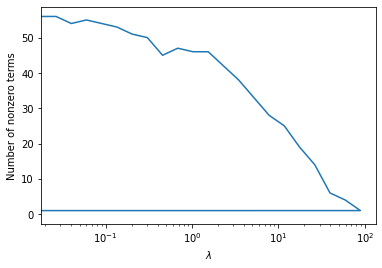

In [40]:
print(lam_list)
print(num_nonzero_list)
plt.plot(lam_list, num_nonzero_list)
plt.xlabel(r'$\lambda$')
plt.ylabel('Number of nonzero terms')
plt.xscale('log')

In [ ]:
# print(w.shape)
# print(x.shape)
# print(x)
# print(w.T@x)
# b = np.mean(y - np.sum(w.T@x))
# print(b)

print(y.shape)
print(b.shape)
print(sum(w.T@x).shape)
print(sum(np.multiply(w.T, np.diagonal(x))).shape)
print(np.sum(np.multiply(w.T, np.diagonal(x))))


In [ ]:
np.multiply(w.T, np.diagonal(x))
# np.diagonal(x)
# w